### Crime Data Analysis

##### Table of Contents

[Objective](#ob)

[Importing the data](#id)

[Descriptive Statistics](#dd)

[Elbow method to find best k](#em)

[K-means Clustering](#kc)

[Observations and Conclusions](#oc)

**Objective:**  <a name='ob'></a>
Goal is to assign the instances of crime for the given year into certain groups using K-means algorithm & essentially suggest possible action for each cluster


**Attribute Description:**

1. Murder: (Numeric) Murder arrests (per 100,000) 
2. Assault: (Numeric) Assault arrests (per 100,000) 
3. Urban Population: (Numeric) Percent urban population 
4. Rape: (Numeric) Rape arrests (per 100,000) 

**Importing the data** <a name='id'></a>

In [30]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os

import seaborn as sns ### for visualizations
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn import datasets, metrics, cluster, mixture  # For clustering 

In [31]:
print(os.getcwd());#setting work directory

E:\Tech UpX\Kmeans


In [32]:
cdata=pd.read_csv("crime_data1.csv") #loading the data

In [33]:
cdata.head(3)

,State,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236.0,58.0,21.2
1,Alaska,10.0,NaN,48.0,44.5
2,Arizona,8.1,294.0,80.0,31.0


Top 3 rows of the dataset<br/>
Missing values are denoted as NaN

**Descriptive Statistics**<a name='dd'></a>

In [34]:
cdata.describe()

,Murder,Assault,UrbanPop,Rape
count,48.000000,47.000000,46.000000,47.000000
mean,7.787500,166.276596,65.565217,21.112766
std,4.429909,83.811305,14.617573,9.634102
min,0.800000,45.000000,32.000000,7.300000
25%,3.950000,107.500000,54.500000,14.900000
50%,7.250000,156.000000,66.500000,19.500000
75%,11.325000,243.500000,77.750000,26.500000
max,17.400000,337.000000,91.000000,46.000000


Range is high<br/>
Missing values are there

In [35]:
cdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
State       50 non-null object
Murder      48 non-null float64
Assault     47 non-null float64
UrbanPop    46 non-null float64
Rape        47 non-null float64
dtypes: float64(4), object(1)
memory usage: 2.0+ KB


**No of Rows:** 50 <br/>
**No of Columns:** 5 <br/>

**Observations:** There are missing values in all columns except State. 2 missing values in Murder Column, 3 in Assualt Column, 4 in UrbanPop column and finally 3 values missing in Rape column

#### Missing values

In [36]:
cdata.isnull().sum()

State       0
Murder      2
Assault     3
UrbanPop    4
Rape        3
dtype: int64

**Imputing missing values**

In [37]:
crime_data=cdata.fillna(cdata.mean())

In [38]:
print(cdata.head())
print(round(crime_data.head()),1)## Method is same as that of imputer

        State  Murder  Assault  UrbanPop  Rape
0     Alabama    13.2    236.0      58.0  21.2
1      Alaska    10.0      NaN      48.0  44.5
2     Arizona     8.1    294.0      80.0  31.0
3    Arkansas     8.8    190.0       NaN  19.5
4  California     9.0    276.0      91.0  40.6
        State  Murder  Assault  UrbanPop  Rape
0     Alabama    13.0    236.0      58.0  21.0
1      Alaska    10.0    166.0      48.0  44.0
2     Arizona     8.0    294.0      80.0  31.0
3    Arkansas     9.0    190.0      66.0  20.0
4  California     9.0    276.0      91.0  41.0 1


#### Elbow method to find best K for kmeans clustering

In [39]:
# k-means cluster analysis for 1-15 clusters                                              
from scipy.spatial.distance import cdist
clusters=range(1,15)
ssw=[]

# loop through each cluster and fit the model to the data set
# generate the predicted cluster assingment and append the mean 
# distance my taking the sum divided by the shape

for k in clusters:
    model=KMeans(n_clusters=k,init="k-means++",n_init=10, max_iter=300, random_state=0)
    model.fit(crime_data.iloc[:,1:4])
    ssw.append(model.inertia_/100)
    

In [40]:
clusters_pivot=pd.DataFrame({"no.clusters":clusters,"SSW":ssw})
clusters_pivot

,SSW,no.clusters
0,3336.570411,1
1,991.904375,2
2,426.098768,3
3,295.449950,4
4,197.927980,5
5,159.483593,6
6,127.864097,7
7,106.864304,8
8,93.457370,9
9,77.223596,10


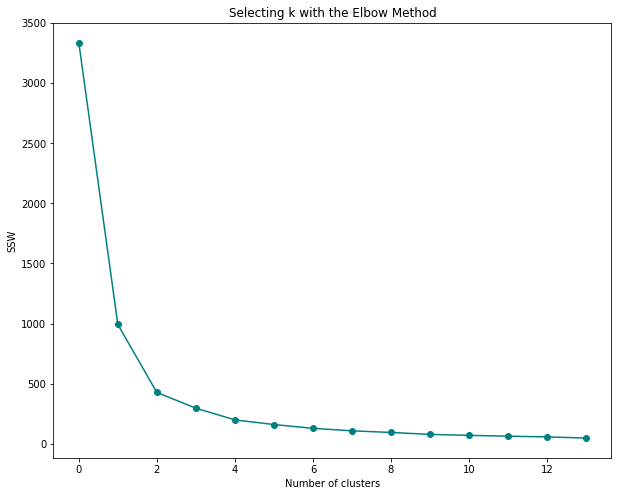

In [41]:
#Plot average distance from observations from the cluster centroid
#to use the Elbow Method to identify number of clusters to choose
plt.figure(figsize=(10,8))
plt.plot(ssw,marker = "o",color="teal")
plt.xlabel('Number of clusters')
plt.ylabel('SSW')
plt.title('Selecting k with the Elbow Method') 
plt.show()
# pick the fewest number of clusters that reduces the average distance
# If you observe after 3 we can see graph is almost linear

**Observations:** If you see after cluster 3, there is no variation. Hence from the above graph, it is evident that the best k is 3. 

#### K-means clustering K=3<a name='kc'></a>

In [42]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)
kmeans.fit(crime_data.iloc[:,1:])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [43]:
cluster=kmeans.labels_
print(cluster)
print(kmeans.cluster_centers_)

[1 0 1 0 1 0 2 1 1 0 2 2 1 2 2 2 2 0 2 1 0 1 2 1 0 2 2 1 2 0 1 1 1 2 2 0 0
 2 0 1 2 0 0 2 2 0 0 2 2 0]
[[   8.775       169.6143617    69.01630435   23.83829787]
 [  11.82053571  274.92857143   69.92857143   27.66428571]
 [   4.174375     87.55         59.75         14.3462766 ]]


In [44]:
crime_data['cluster']=cluster
crime_data=round(crime_data,1)
print(crime_data.head())
print(crime_data.tail())

        State  Murder  Assault  UrbanPop  Rape  cluster
0     Alabama    13.2    236.0      58.0  21.2        1
1      Alaska    10.0    166.3      48.0  44.5        0
2     Arizona     8.1    294.0      80.0  31.0        1
3    Arkansas     8.8    190.0      65.6  19.5        0
4  California     9.0    276.0      91.0  40.6        1
            State  Murder  Assault  UrbanPop  Rape  cluster
45       Virginia     8.5    156.0      63.0  20.7        0
46     Washington     4.0    145.0      73.0  21.1        0
47  West Virginia     5.7     81.0      39.0   9.3        2
48      Wisconsin     2.6     53.0      66.0  10.8        2
49        Wyoming     6.8    161.0      60.0  15.6        0


In [45]:
cluster_size=crime_data.groupby(['cluster']).size()
print(cluster_size)

cluster
0    16
1    14
2    20
dtype: int64


In [46]:
name=["Murder","Assault","Urbanpop","Rape"]
centroids=kmeans.cluster_centers_
cluster_centriods=pd.DataFrame(centroids,columns=name)
print(cluster_centriods)

      Murder     Assault   Urbanpop       Rape
0   8.775000  169.614362  69.016304  23.838298
1  11.820536  274.928571  69.928571  27.664286
2   4.174375   87.550000  59.750000  14.346277


In [53]:
scatt = plt.scatter(crime_data[:, 0], crime_data[:, 3], c=kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 3], c='black', s=200, alpha=0.5);
plt.colorbar(scatt)

TypeError: unhashable type: 'slice'

**Observations:** From the above graph, both the clusters are equally high with crime activites.

#### K-means clustering K=4

In [21]:
#kmeans1 = KMeans(n_clusters=4)
#kmeans1.fit(num_data)
#y_kmeans1 = kmeans1.predict(train)

In [22]:
#kmeans1.cluster_centers_

In [23]:
#scatter = plt.scatter(train[:, 0], train[:, 3], c=y_kmeans1, s=50, cmap='viridis')
#centers = kmeans.cluster_centers_
#plt.scatter(centers[:, 0], centers[:, 3], c='black', s=200, alpha=0.5);
#plt.colorbar(scatter)

**Observations:** <br/>
From the above graph, it is now clear that cluster 0 and 2 are highly crime happening areas.. Need to focus on those areas to reduce crime activity.
